<a href="https://colab.research.google.com/github/prmaciel21/math120_final/blob/main/final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Recognition with PCA

This notebook demonstrates the use of PCA in facial recognition.

## Load Github Repo

In [91]:
import os
import sys

# import dataset instead of saving in repository
# too much data, makes it hard when trying to make changes
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

print("Path to dataset files:", path)

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/math120_final/'):
        !git clone https://github.com/prmaciel21/math120_final.git
        # Change to project directory
        os.chdir('/content/math120_final')
    else:
        print("Repository already cloned")
        # Change to project directory
        os.chdir('/content/math120_final')
        !git pull https://github.com/prmaciel21/math120_final.git

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Using Colab cache for faster access to the 'lfw-dataset' dataset.
Path to dataset files: /kaggle/input/lfw-dataset
Running in Google Colab
Repository already cloned
From https://github.com/prmaciel21/math120_final
 * branch              HEAD       -> FETCH_HEAD
Already up to date.
Current working directory: /content/math120_final


## Import Dependencies for Data Cleaning

In [79]:
import pandas as pd

# from data.py file
from data import load_data, clean_data, save_data

In [80]:
img_raw = load_data(path + '/lfw_allnames.csv')

# keeping only the people who have between 20 and 30 pictures
# pertaining to them since dataset is so large
img_to_keep = clean_data(img_raw)

print(img_raw.head())
print(img_to_keep)

              name  images
0          AJ_Cook       1
1         AJ_Lamas       1
2    Aaron_Eckhart       1
3      Aaron_Guiel       1
4  Aaron_Patterson       1
                      name  images
223        Amelie_Mauresmo      21
304         Angelina_Jolie      20
417   Atal_Bihari_Vajpayee      24
531           Bill_Clinton      29
786           Carlos_Menem      21
1866      George_Robertson      22
1964            Gray_Davis      26
1993       Guillermo_Coria      30
2027          Hamid_Karzai      22
2210           Igor_Ivanov      20
2276            Jack_Straw      28
2506      Jennifer_Aniston      21
2514        Jennifer_Lopez      21
2530     Jeremy_Greenstock      24
2570           Jiang_Zemin      20
2846      Jose_Maria_Aznar      23
2884   Juan_Carlos_Ferrero      28
3327     Lindsay_Davenport      22
3434         Mahmoud_Abbas      29
3737     Michael_Bloomberg      20
4012           Naomi_Watts      22
4242           Paul_Bremer      20
4333          Pete_Sampras      2

In [81]:
#save all folders with 20-30 images in /cleaned_data
save_data(
    img_to_keep,
    os.path.join(path, "lfw-deepfunneled/lfw-deepfunneled"),
    "/content/math120_final/cleaned_data"
)


[SKIP] Exists in output: Amelie_Mauresmo
[SKIP] Exists in output: Angelina_Jolie
[SKIP] Exists in output: Atal_Bihari_Vajpayee
[SKIP] Exists in output: Bill_Clinton
[SKIP] Exists in output: Carlos_Menem
[SKIP] Exists in output: George_Robertson
[SKIP] Exists in output: Gray_Davis
[SKIP] Exists in output: Guillermo_Coria
[SKIP] Exists in output: Hamid_Karzai
[SKIP] Exists in output: Igor_Ivanov
[SKIP] Exists in output: Jack_Straw
[SKIP] Exists in output: Jennifer_Aniston
[SKIP] Exists in output: Jennifer_Lopez
[SKIP] Exists in output: Jeremy_Greenstock
[SKIP] Exists in output: Jiang_Zemin
[SKIP] Exists in output: Jose_Maria_Aznar
[SKIP] Exists in output: Juan_Carlos_Ferrero
[SKIP] Exists in output: Lindsay_Davenport
[SKIP] Exists in output: Mahmoud_Abbas
[SKIP] Exists in output: Michael_Bloomberg
[SKIP] Exists in output: Naomi_Watts
[SKIP] Exists in output: Paul_Bremer
[SKIP] Exists in output: Pete_Sampras
[SKIP] Exists in output: Recep_Tayyip_Erdogan
[SKIP] Exists in output: Ricardo_La

## PCA Implementation

This takes the cleaned data and performs PCA on it using the functions described in ```pca_model.py```

### Import Important Libraries and Dependencies

In [82]:
from pca_model import load_img, compute_pca, plot_mean_face, plot_eigenfaces, classifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random

### PCA

In [83]:
# folder with all person image folders
working_dir = "/content/math120_final/cleaned_data"

In [84]:
# loading all images
print("Loading images")
X, y, label_map = load_img(working_dir)
print(f"Loaded {X.shape[0]} images")

Loading images
Loaded 713 images


Plotting mean face


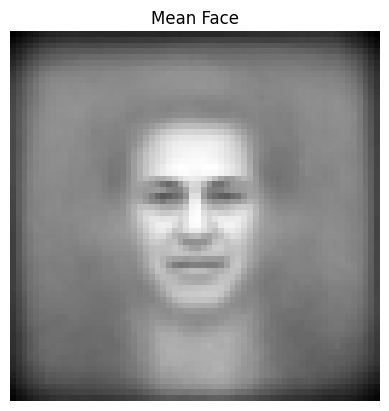

In [85]:
print("Plotting mean face")
plot_mean_face(X)

In [86]:
print("Running PCA")
pca, X_pca = compute_pca(X)

Running PCA
Using 245 PCA components


Plotting eigenfaces


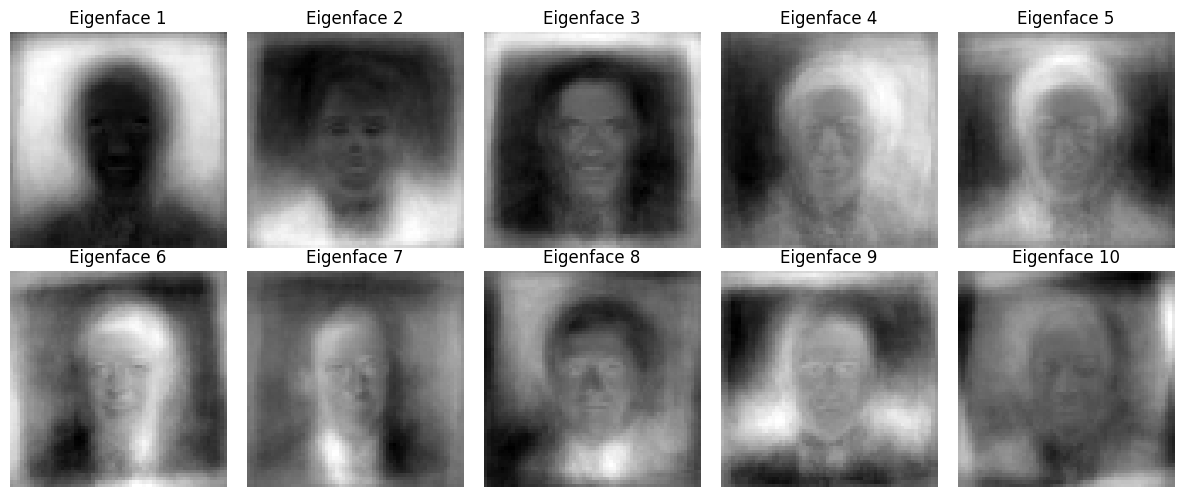

In [87]:
print("Plotting eigenfaces")
plot_eigenfaces(pca)

## Results

Evaluating classifier
SVM accuracy: 30.07%


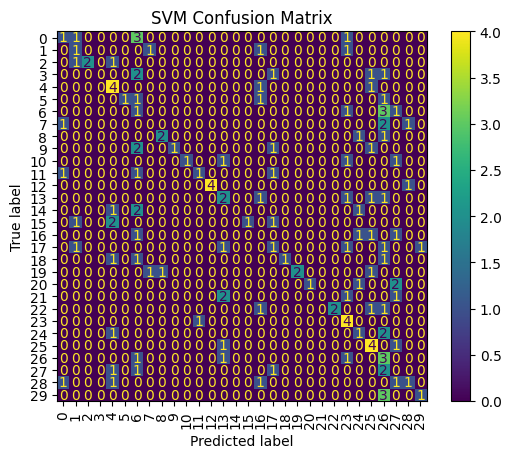

In [88]:
print("Evaluating classifier")
svm_model, acc = classifier(X_pca, y, label_map)

### Accuracy vs PCA Components

In [89]:
components = [30, 50, 75, 100, 150]
accuracies = []

for c in components:
  pca = PCA(n_components=c, whiten=True, random_state=42)
  X_pca = pca.fit_transform(X, 255.0)

  _, acc = classifier(X_pca, y, show_confusion=False)
  accuracies.append(acc)

SVM accuracy: 28.67%
SVM accuracy: 29.37%
SVM accuracy: 34.97%
SVM accuracy: 31.47%
SVM accuracy: 33.57%


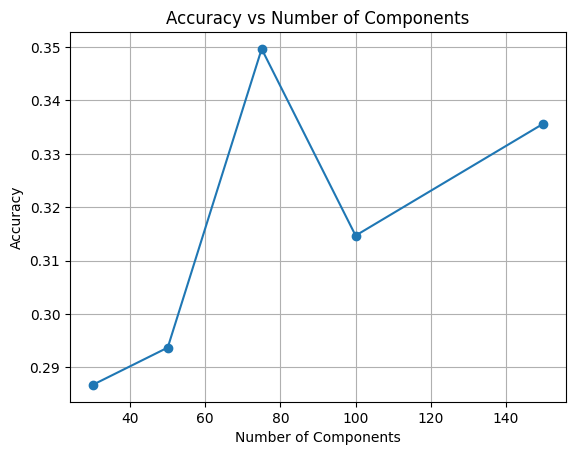

In [90]:
plt.plot(components, accuracies, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Components")
plt.grid(True)
plt.show()

## Conclusion

This notebook demonstrated the application of Principal Component Analysis (PCA) for facial recognition. We loaded and cleaned a dataset of faces, performed PCA to reduce dimensionality and extract eigenfaces, and then used a classifier to identify individuals. Although the results we found were not the highest, we can use larger data files and cleaner images to show that PCA can be an effective technique for facial recognition, with accuracy varying based on the number of principal components used.